In [433]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [465]:
def B_sheet(r_a,r_b,r_2,n ,Br,alpha):

    pp = alpha*np.cross(r_2 - r_a,n)
    A = np.dot(r_2-r_a,r_2-r_a)
    B = np.dot(r_2 - r_a,r_b - r_a)
    C = np.dot(r_b - r_a,r_b - r_a)
    D = np.dot(r_2 - r_a,pp) 
    P = alpha*np.cross((r_b - r_a),n) 

    a1 = A*C - 2*B*C +C**2
    b1 = -2*C*D
    c1 = (alpha**2)*C**2
    p1 = (C-B)**2
    d1 = b1**2 - 4*(a1 + p1)*c1


    a2 = A*C
    b2 = -2*C*D
    c2 = (alpha**2)*C**2

    ru = a1 + b1*(1/2) + c1*(1/2)**2 
    rl = a2 + b2*(-1/2) + c2*(-1/2)**2

    su = 0.5
    sl = 0.5
    #print(p1)
    if p1 > 0:
        I1 = (1/np.sqrt(p1))*(np.arctan(np.sqrt(ru/p1)) -  np.arctan(np.sqrt(rl/p1)))
    else:
        I_u1 = np.log(np.sqrt(-p1) - np.sqrt(ru)/(np.sqrt(-p1) + np.sqrt(ru)))
        I_l1 = np.log(np.sqrt(-p1) - np.sqrt(rl)/(np.sqrt(-p1) + np.sqrt(rl)))
        I1 = 1/(2*np.sqrt(-p1))*(I_u1 - I_l1)
    if p1*d1 > 0:
        I2 = - np.arctan(np.sqrt(p1/d1))*(b1 + 2*c1*su/np.sqrt(ru)) + np.arctan(np.sqrt(p1/d1))*(b1 + 2*c1*sl/np.sqrt(rl))
    else:
        if p1 >0:
            I2_u = np.log((np.sqrt(-d1)*np.sqrt(ru) + np.sqrt(p1)*(b1 + 2*c1*(0.5)))/(np.sqrt(-d1)*np.sqrt(ru)- np.sqrt(p1)*(b1 + 2*c1*(0.5)))) 
            I2_l = np.log((np.sqrt(-d1)*np.sqrt(rl) + np.sqrt(p1)*(b1 + 2*c1*(-0.5)))/(np.sqrt(-d1)*np.sqrt(rl)- np.sqrt(p1)*(b1 + 2*c1*(-0.5)))) 
            I2 = 1/(2*1j)*(I2_u - I2_l)
        else:
            I2_u = np.log((np.sqrt(d1)*np.sqrt(ru) + np.sqrt(-p1)*(b1 + 2*c1*(0.5)))/(np.sqrt(d1)*np.sqrt(ru)- np.sqrt(-p1)*(b1 + 2*c1*(0.5)))) 
            I2_l = np.log((np.sqrt(d1)*np.sqrt(rl) + np.sqrt(-p1)*(b1 + 2*c1*(-0.5)))/(np.sqrt(d1)*np.sqrt(rl)- np.sqrt(-p1)*(b1 + 2*c1*(-0.5))))
            I2 =  1/(2*1j)*(I2_u - I2_l)
        U1 = B
        v1 = C-B
        if  (c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1) >  0:
            integ_1 = (U1/c1)*I1  - I2*(2*(v1*c1)-U1*b1)/(np.sqrt((c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1)))
        else:
            integ_1 = (U1/c1)*I1  - I2*(2*(v1*c1)-U1*b1)/(1J*np.sqrt(abs((c1**2)*p1*((b1)**2 - 4*(a1 +p1)*c1))))
        B_s_1 = np.real((Br*alpha*C/(4*np.pi))*integ_1*(np.cross(r_b - r_a,r_2 - r_a)))
        B_s_2 = np.real((Br*alpha*C**2/(4*np.pi))*integ_1)*n
        B_s = B_s_1 + B_s_2

    return B_s
   
    


In [473]:
r_a = np.array([0,-1,0])
r_b = np.array([0,1,0])
n = np.array([0,0,1])
alpha = (1)/(np.linalg.norm(r_b - r_a))
Br = 1
r_2 = np.array([100,100,100])
cub1 = cube(1) 
B = np.dot(r_2 - r_a,r_b - r_a)
C = np.dot(r_b - r_a,r_b - r_a)
B_cube = B_sheet(cube1.ra1,cube1.rb1,r_2,cube1.nn1,Br,alpha) +  B_sheet(cube1.ra2,cube1.rb2,r_2,cube1.nn1,Br,alpha) + B_sheet(cube1.ra3,cube1.rb3,r_2,cube1.nn1,Br,alpha) + B_sheet(cube1.ra4,cube1.rb4,r_2,cube1.nn1,Br,alpha)
print(B_cube[0])


-0.012562369726227979


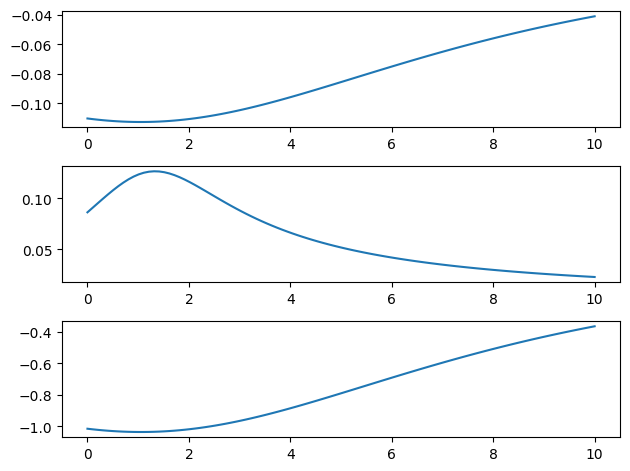

In [467]:
r_a = np.array([2,-10,3])
r_b = np.array([1,1,1])
n = np.array([0,0,1])
alpha = (1)/(np.linalg.norm(r_b - r_a))
Br = 1
x = np.linspace(0,10,100)
X,Y,Z = np.meshgrid(x,y,z)


B_slx= []
B_sly = []
B_slz = []


for i in x:
    r_2x = np.array([i,6,1])
    r_2y = np.array([3,i,1])
    r_2z = np.array([3,6,i])
    B_sx = B_sheet(r_a,r_b,r_2x,n,Br,alpha)
    B_sy = B_sheet(r_a,r_b,r_2y,n,Br,alpha)
    B_sz = B_sheet(r_a,r_b,r_2z,n,Br,alpha)

    B_slx.append(B_sx[0]) 
    B_sly.append(B_sy[1])
    B_slz.append(B_sz[2])

fig,ax = plt.subplots(3, 1)
ax[0].plot(x,B_slx)
ax[1].plot(x,B_sly)
ax[2].plot(x,B_slz)
plt.tight_layout()

In [461]:
def make_cube(a2,alpha):
    ra1 = np.array([a2,-a2,0])
    rb1 = np.array([a2,a2,0])
    nn1 =  np.array([1,0,0])
    ra2 = rb1 
    rb2 = np.array([-a2,a2,0])
    nn2 = [0,1,0]
    r_a2 = rb2
    r_b3 = np.array([-a2,-a2,0])
    nn3 = np.array([-1,0,0])
    r_a4 = r_b3
    r_b4 = ra1
    nn4 = np.array([0,-1,0])
    return [ra1 , rb1 , nn1 , ra2 , rb2 , nn2 , r_a2 , r_b3 , nn3 , r_a4 , r_b4 , nn4]


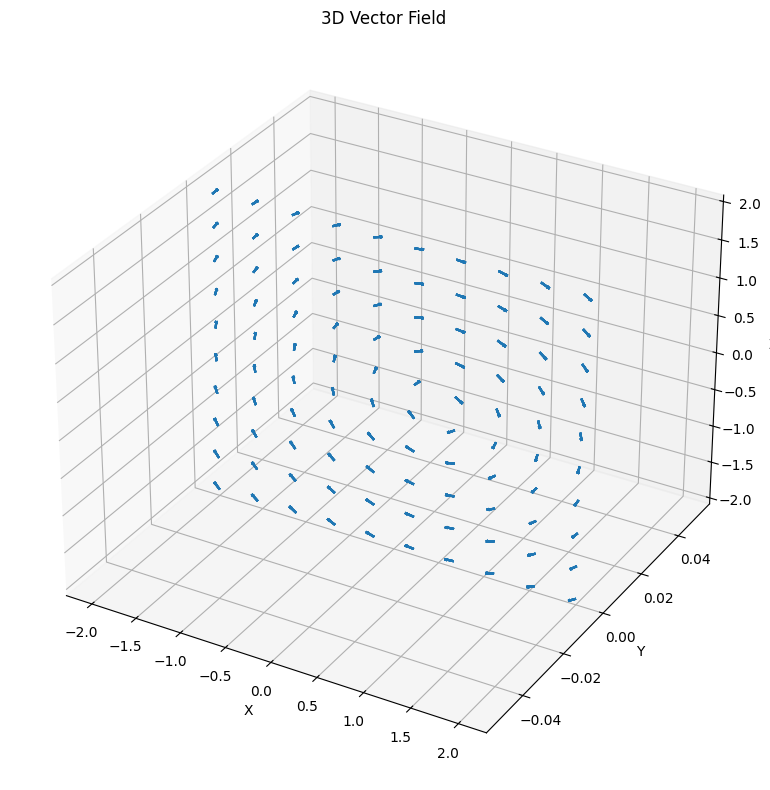

In [468]:
r_a = np.array([0, 0,0])
r_b = np.array([00, 0.5, 0])
n = np.array([0, 0, 1])
alpha = 1
Br = 1

# Create grid
x = np.linspace(-2, 2, 10)  # Smaller grid for better visualization
y = np.linspace(0,0, 10)
z = np.linspace(-2, 2, 10)
X, Y, Z = np.meshgrid(x, y, z)

# Initialize arrays to hold the vector field components
Bx = np.zeros(X.shape)
By = np.zeros(Y.shape)
Bz = np.zeros(Z.shape)

# Calculate B field at each grid point
for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            r_2 = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            B = B_sheet(r_a, r_b, r_2, n, Br, alpha)
            Bx[i, j, k] = B[0]
            By[i, j, k] = B[1]
            Bz[i, j, k] = B[2]

# Create figure for 3D quiver plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vector field using quiver
ax.quiver(X, Y,Z, Bx, By,Bz,length=0.1, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Field')

plt.tight_layout()

plt.show()


In [463]:
class cube:
    def __init__(self, a):
        self.make_cube(a)
    def make_cube(self, a):
        self.ra1 = np.array([a ,-a , 0])
        self.rb1 = np.array([a,a,0])
        self.nn1 = np.array([1,0,0])
        self.r_d1 = np.array([a,0,0])
        self.ra2 = self.rb1 
        self.rb2 = np.array([-a,a,0])
        self.nn2 = np.array([0,1,0])
        self.r_d2 = np.array([0,a,0])
        self.ra3 = self.rb2
        self.rb3 = np.array([-a,-a,0])
        self.r_d3 = np.array([-a,0,0])
        self.nn3 = np.array([-1,0,0])
        self.ra4 = self.rb3
        self.rb4 = self.ra1
        self.r_d4 =  np.array([0,-a,0])
        self.nn4 = np.array([0,-1,0])

        

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10, 10, 10) and arg 3 with shape (1000,).

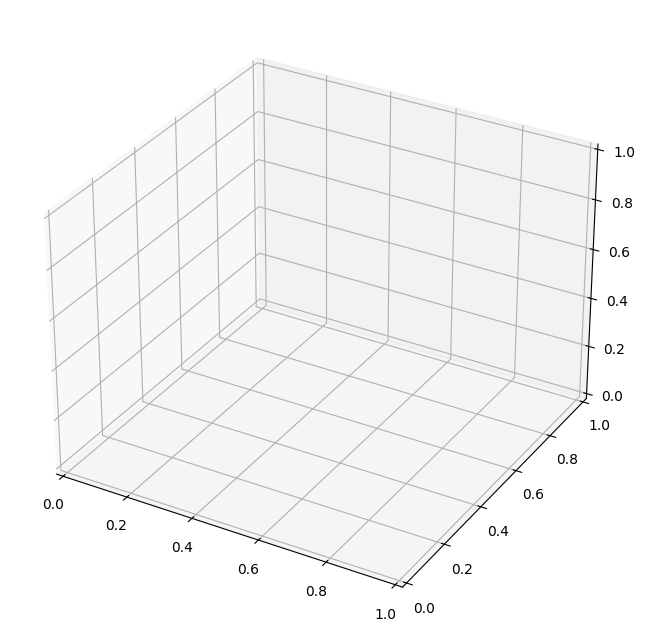

In [480]:
alpah = 1
a =1
cube1 = cube(4)
r_a = np.array([0,0,0])
r_b = np.array([0, 0.5, 0])
n = np.array([0, 0, 1])
alpha = 1
Br = 1

# Create grid
x = np.linspace(-5, 5, 10)
  # Smaller grid for better visualization
y = np.linspace(0,0, 10)

z = np.linspace( -5,5,10)

X, Y, Z = np.meshgrid(x, y, z)

# Initialize arrays to hold the vector field components
Bx = []
By = []
Bz = []


# Calculate B field at each grid point
for i in x:
  for j in y:
    for n in z:
      r_j = np.array([i,j,n])
      B_cube = B_sheet(cube1.ra1,cube1.rb1,np.array([i,j,n]),cube1.nn1,Br,alpha) +  B_sheet(cube1.ra2,cube1.rb2,np.array([i,j,n]),cube1.nn1,Br,alpha) + B_sheet(cube1.ra3,cube1.rb3,np.array([i,j,n]),cube1.nn1,Br,alpha) + B_sheet(cube1.ra4,cube1.rb4,np.array([i,j,n]),cube1.nn1,Br,alpha)
      Bx.append(B_cube[0])
      By.append(B_cube[1])
      Bz.append(B_cube[2])

# Create figure for 3D quiver plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vector field using quiver
ax.quiver(X, Y,Z, Bx, By,Bz,length=0.1, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Field')

plt.tight_layout()

plt.show()


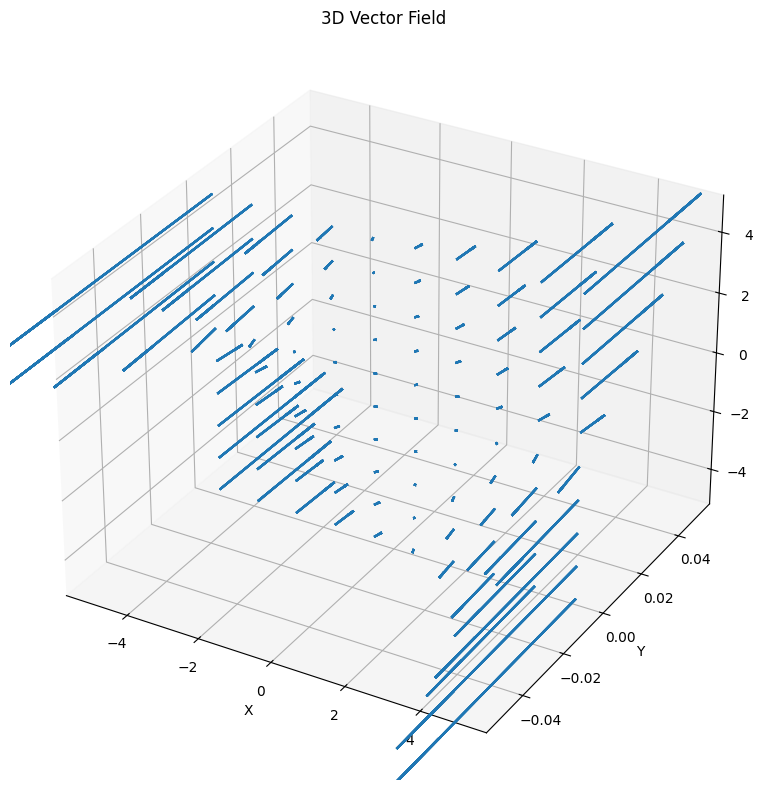

In [481]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming cube() and B_sheet() are defined somewhere
# Initialize variables
alpha = 1
a = 1
Br = 1
cube1 = cube(4)  # Ensure this function is defined correctly

# Create grid
x = np.linspace(-5, 5, 10)
y = np.linspace(0, 0, 10)  # Single layer at y = 0
z = np.linspace(-5, 5, 10)

X, Y, Z = np.meshgrid(x, y, z)

# Initialize arrays for B field components with the same shape as X, Y, Z
Bx = np.zeros_like(X)
By = np.zeros_like(Y)
Bz = np.zeros_like(Z)

# Calculate B field at each grid point
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            r_j = np.array([X[i, j, k], Y[i, j, k], Z[i, j, k]])
            # Sum the contributions from different sheets (assuming B_sheet() is defined)
            B_cube = (
                B_sheet(cube1.ra1, cube1.rb1, r_j, cube1.nn1, Br, alpha) +
                B_sheet(cube1.ra2, cube1.rb2, r_j, cube1.nn1, Br, alpha) +
                B_sheet(cube1.ra3, cube1.rb3, r_j, cube1.nn1, Br, alpha) +
                B_sheet(cube1.ra4, cube1.rb4, r_j, cube1.nn1, Br, alpha)
            )
            Bx[i, j, k] = B_cube[0]
            By[i, j, k] = B_cube[1]
            Bz[i, j, k] = B_cube[2]

# Create figure for 3D quiver plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vector field using quiver
ax.quiver(X, Y, Z, Bx, By, Bz, length=0.1, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Field')

plt.tight_layout()
plt.show()


In [470]:
cube1.r_d4
cube1.r_d3
cube1.r_d3
cube1.r_d2
cube1.r_d1

array([4, 0, 0])

In [471]:

pp = alpha*np.cross(r_2 - r_a,n)
A = np.dot(r_2-r_a,r_2-r_a)
B = np.dot(r_2 - r_a,r_b - r_a)
C = np.dot(r_b - r_a,r_b - r_a)
D = np.dot(r_2 - r_a,pp) 
P = alpha*np.cross((r_b - r_a),n) 

a1 = A*C - 2*B*C +C**2
b1 = -2*C*D
c1 = (alpha**2)*C**2
p1 = (C-B)**2
d1 = b1**2 - 4*(a1 + p1)*c1


a2 = A*C
b2 = -2*C*D
c2 = (alpha**2)*C**2

ru = a1 + b1*(1/2) + c1*(1/2)**2 
rl = a2 + b2*(-1/2) + c2*(-1/2)**2

I_u1 = (np.sqrt(-p1) - np.sqrt(ru)/(np.sqrt(-p1) + np.sqrt(ru)))
p1

C:\Users\benfo\AppData\Local\Temp\ipykernel_25812\1953454941.py:22: RuntimeWarning: invalid value encountered in sqrt
  I_u1 = (np.sqrt(-p1) - np.sqrt(ru)/(np.sqrt(-p1) + np.sqrt(ru)))


0.0625